# I. Lý thuyết

1) Transfer Learning thường được thực hiện trên hai dữ liệu nguồn (huấn luyện mô hình nguồn) và dữ liệu đích (huấn luyện mô hình đích) thế nào ?


A. Dữ liệu nguồn và dữ liệu đích có sự liên quan tới nhau. Những đặc trưng trong dữ liệu đích xuất hiện ở những dữ liệu nguồn.

B. Dữ liệu nguồn có số lượng classes lớn hơn dữ liệu đích.

C. Kích thước của dữ liệu nguồn rất nhỏ.

D. Dữ liệu đích ít liên quan tới dữ liệu nguồn.


2) Khi nào thì chúng ta nên thực hiện fine tuning trên toàn bộ các layers của mô hình đích ?

A. Khi hai dữ liệu nguồn và đích có mức độ tương đồng cao và dữ liệu đích có kích thước lớn.

B. Khi hai dữ liệu nguồn và đích có mức độ tương đồng cao và dữ liệu đích có kích thước nhỏ.

C. Dữ liệu đích có kích thước nhỏ và dữ liệu mục tiêu có kích thước lớn.

D. Cả hai dữ liệu đích và mục tiêu đều có kích thước nhỏ.


3) Các phương pháp augmentation nào sẽ kết hợp nội dung từ hai ảnh lẫn nhau và tạo ra một nhãn mềm (_soft label_) cho ảnh?

A. Rotation, Random Crop, MixUp

B. Bright Constrast, Color Shift, Addition Noise

C. CutMix, MixUp

D. Flip, Information Loss 


4) Quá trình xây dựng một mô hình AI trong dự án là một chu trình Machine Learning Cycle kế hợp giữa huấn luyện và gán nhãn dữ liệu. Để tiết kiệm chi phí gán nhãn chúng ta nên sử dụng phương pháp nào ?

A. Lấy mẫu ngẫu nhiên từ tập unlabeled dataset để thực hiện gán nhãn.

B. Sử dụng Active Learning để lựa chọn mẫu mang lại thông tin giúp cải thiện nhiều nhất cho hiệu suất mô hình.

C. Lựa chọn mô hình pretrained lớn nhất có thể.

D. Chỉ lựa các dữ liệu có thông tin rõ ràng, có thể phân biệt được bởi con người.

5) Mô hình lớn thường đạt độ chính xác cao nhưng không deploy được trên các thiết bị edge device, IoT,... Trong khi mô hình nhỏ có thể deploy được nhưng thường có độ chính xác thấp. Phương pháp nào có thể giúp mô hình nhỏ cải thiện được độ chính xác ? Có thể lựa chọn nhiều đáp án.

A. Sử dụng active learning để lựa chọn các mẫu đại diện cho tổng thể để huấn luyện mô hình nhỏ.

B. Áp dụng augmentation để huấn luyện mô hình nhỏ.

C. Fine tuning các layers của mô hình lớn sang mô hình nhỏ.

D. Sử dụng knowledge distillation để chuyển giao tri thức từ mô hình lớn sang mô hình nhỏ.

## Câu 1: A

## Câu 2: A

## Câu 3: C

## Câu 4: B

## Câu 5: B,C,D

# II. Thực hành

6) Từ bộ dữ liệu [Dog and Cat](https://www.kaggle.com/c/dog-vs-cat-classification/data), hãy huấn luyện một mô hình large (chẳng hạn ResNet50) bằng cách fine-tuning lại các trọng số từ pretrained model của bộ dữ liệu ImageNet. Huấn luyện trên 5 epochs.

7) Hãy huấn luyện một mô hình small (chẳng hạn MobileNetV3) không sử dụng pretrained model trên 1 epochs.

8) Sử dụng mô hình large làm teacher để cải thiện mô hình small là student theo phương pháp knowledge distillation.

9) Áp dụng thêm các kĩ thuật data augmentation kết hợp ảnh khác nhãn để tạo thành nhãn mềm và huấn luyện cải thiện tiếp model student.

10) Giả định cần huấn luyện tiếp mô hình student với các dữ liệu mới chưa được gán nhãn. Hãy xây dựng một kĩ thuật lựa chọn mẫu dựa trên đánh giá uncertainty.

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.chdir('gdrive/MyDrive/DeepLearning Course 3')

Mounted at /content/gdrive


In [ ]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import Sequence

In [ ]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 64

data_path = './dataset/dog-vs-cat-classification/train/train'

data_gen = ImageDataGenerator(rescale=1/255., validation_split=0.2)

print("Training data:")
train_data = data_gen.flow_from_directory(data_path,
                                        target_size=IMAGE_SHAPE,
                                        batch_size=BATCH_SIZE,
                                        class_mode='binary',
                                        shuffle=True,
                                        seed=42,
                                        subset='training')
                                           

print("Testing data")
val_data = data_gen.flow_from_directory(data_path,
                                    target_size=IMAGE_SHAPE,
                                    batch_size=BATCH_SIZE,
                                    class_mode='binary',
                                    subset='validation')

Training data:
Found 20000 images belonging to 2 classes.
Testing data
Found 5000 images belonging to 2 classes.


In [ ]:
# Pretrained model URL
resnet_url = 'https://tfhub.dev/tensorflow/resnet_50/feature_vector/1'

In [ ]:
def create_model(model_url):
    feature_extraction_layer = hub.KerasLayer(model_url,
                                              trainable=False,
                                              input_shape=(IMAGE_SHAPE + (3,)))
    model = tf.keras.models.Sequential([feature_extraction_layer,
                                        tf.keras.layers.Dense(16, activation='relu'),
                                        tf.keras.layers.Dense(2, activation='softmax')])
    
    return model

## Câu 6

In [ ]:
resnet_model = create_model(resnet_url)
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23561152  
                                                                 
 dense (Dense)               (None, 16)                32784     
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 23,593,970
Trainable params: 32,818
Non-trainable params: 23,561,152
_________________________________________________________________


In [ ]:
# Warm-up
resnet_model.compile(loss='sparse_categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(0.001),
                     metrics=['acc'])

checkpoint_path = 'resnetq6/checkpoint.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      verbose=1)
initial_epochs = 1
resnet_history = resnet_model.fit(train_data,
                                  epochs=initial_epochs, 
                                  validation_data=val_data,
                                  validation_steps=int(0.25 * len(val_data)),
                                  callbacks=[model_checkpoint])

In [ ]:
result_warm_up_resnet = resnet_model.evaluate(val_data)
result_warm_up_resnet

79/79 [==============================] - 755s 10s/step - loss: 0.0320 - acc: 0.9882


[0.03197458013892174, 0.9882000088691711]

In [ ]:
# Fine-tuning
resnet_model.layers[0].trainable = True
for layer in resnet_model.layers:
    print(layer, layer.trainable)

resnet_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.0001),
              metrics=["accuracy"])

initial_epochs = 1
fine_tune_epochs = initial_epochs + 4

checkpoint_path = 'resnetq6/checkpoint_finetuningQ6.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      verbose=1)
history_fine_tuning = resnet_model.fit(train_data,
                                epochs=fine_tune_epochs,
                                validation_data=val_data,
                                initial_epoch=initial_epochs, 
                                validation_steps=int(0.25 * len(val_data)),
                                callbacks=[model_checkpoint]) 

<tensorflow_hub.keras_layer.KerasLayer object at 0x7fc68461c990> True
<keras.layers.core.dense.Dense object at 0x7fc5f0aca810> True
<keras.layers.core.dense.Dense object at 0x7fc5f0aca690> True
Epoch 2/5
313/313 [==============================] - ETA: 0s - loss: 0.3824 - accuracy: 0.9848
Epoch 2: saving model to resnetq6/checkpoint_finetuningQ6.ckpt
313/313 [==============================] - 233s 704ms/step - loss: 0.3824 - accuracy: 0.9848 - val_loss: 0.3780 - val_accuracy: 0.9868
Epoch 3/5
313/313 [==============================] - ETA: 0s - loss: 0.3501 - accuracy: 0.9939
Epoch 3: saving model to resnetq6/checkpoint_finetuningQ6.ckpt
313/313 [==============================] - 217s 693ms/step - loss: 0.3501 - accuracy: 0.9939 - val_loss: 0.3885 - val_accuracy: 0.9786
Epoch 4/5
313/313 [==============================] - ETA: 0s - loss: 0.3430 - accuracy: 0.9947
Epoch 4: saving model to resnetq6/checkpoint_finetuningQ6.ckpt
313/313 [==============================] - 218s 694ms/step - l

In [ ]:
results_fine_tuning_resnet = resnet_model.evaluate(val_data)
results_fine_tuning_resnet

79/79 [==============================] - 26s 321ms/step - loss: 0.3698 - accuracy: 0.9832


[0.369762659072876, 0.9832000136375427]

In [ ]:
val_loss, val_acc = results_fine_tuning_resnet
print(f'Validation loss: {val_loss:.4f} \nValidation accuracy: {val_acc:.4f} in Resnet50-BaseModel with fine-tuning')

Validation loss: 0.3698 
Validation accuracy: 0.9832 in Resnet50-BaseModel with fine-tuning


## Câu 7

In [ ]:
mobile_net_v3_base_model = applications.MobileNetV3Small(include_top=False,
                                                         weights=None)
mobile_net_v3_base_model.trainable = True

inputs = layers.Input(shape=IMAGE_SHAPE + (3,))
x = mobile_net_v3_base_model(inputs, training=True)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(16, activation='relu')(x)
outputs = layers.Dense(2, activation='softmax')(x)

mobilenet_model = models.Model(inputs, outputs)
mobilenet_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=["accuracy"])

checkpoint_path = 'mobile_netq7/checkpoint.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      verbose=1)
 
retrain_epochs = 1
retrain_mobilenet_history = mobilenet_model.fit(train_data,
                                                epochs=retrain_epochs,
                                                validation_data=val_data,
                                                validation_steps=int(0.25 * len(val_data)),
                                                callbacks=[model_checkpoint])

313/313 [==============================] - ETA: 0s - loss: 0.6000 - accuracy: 0.6726
Epoch 1: saving model to mobile_netq7/checkpoint.ckpt
313/313 [==============================] - 1177s 4s/step - loss: 0.6000 - accuracy: 0.6726 - val_loss: 0.5392 - val_accuracy: 0.7113


In [ ]:
results_retrain_mobile_net = mobilenet_model.evaluate(val_data)
results_retrain_mobile_net

79/79 [==============================] - 23s 288ms/step - loss: 0.5264 - accuracy: 0.7328


[0.526433527469635, 0.7328000068664551]

In [ ]:
val_loss, val_acc = results_retrain_mobile_net
print(f'Validation loss: {val_loss:.4f} \nValidation accuracy: {val_acc:.4f} in MobileNetV3Small without pretrained model')

Validation loss: 0.5264 
Validation accuracy: 0.7328 in MobileNetV3Small without pretrained model


In [ ]:
mobile_net_v3_base_model._weights = 'imagenet'
# Sử dụng lại pretrained model trên 4 epochs tiếp theo

mobilenet_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=["accuracy"])

checkpoint_path = 'mobile_netq7/checkpoint_reuse_pretrained.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      verbose=1)

retrain_epochs = 1 
total_epochs = retrain_epochs + 4
retrain_mobilenet_history = mobilenet_model.fit(train_data,
                                                epochs=total_epochs,
                                                validation_data=val_data,
                                                validation_steps=int(0.25 * len(val_data)),
                                                initial_epoch=retrain_epochs,
                                                callbacks=[model_checkpoint])

Epoch 2/5
313/313 [==============================] - ETA: 0s - loss: 0.4697 - accuracy: 0.7772
Epoch 2: saving model to mobile_netq7/checkpoint_reuse_pretrained.ckpt
313/313 [==============================] - 1167s 4s/step - loss: 0.4697 - accuracy: 0.7772 - val_loss: 0.4227 - val_accuracy: 0.8035
Epoch 3/5
313/313 [==============================] - ETA: 0s - loss: 0.3576 - accuracy: 0.8370
Epoch 3: saving model to mobile_netq7/checkpoint_reuse_pretrained.ckpt
313/313 [==============================] - 1131s 4s/step - loss: 0.3576 - accuracy: 0.8370 - val_loss: 0.3284 - val_accuracy: 0.8479
Epoch 4/5
313/313 [==============================] - ETA: 0s - loss: 0.2919 - accuracy: 0.8719
Epoch 4: saving model to mobile_netq7/checkpoint_reuse_pretrained.ckpt
313/313 [==============================] - 1126s 4s/step - loss: 0.2919 - accuracy: 0.8719 - val_loss: 0.3218 - val_accuracy: 0.8528
Epoch 5/5
313/313 [==============================] - ETA: 0s - loss: 0.2442 - accuracy: 0.8956
Epoch 5:

In [ ]:
results_mobile_net_reuse_pretrained = mobilenet_model.evaluate(val_data)
val_loss, val_acc = results_mobile_net_reuse_pretrained
print(f'Validation loss: {val_loss:.4f} \nValidation accuracy: {val_acc:.4f} in MobileNetV3Small reuse pretrained model')

79/79 [==============================] - 154s 2s/step - loss: 0.2970 - accuracy: 0.8748
Validation loss: 0.2970 
Validation accuracy: 0.8748 in MobileNetV3Small reuse pretrained model


## Câu 8

In [ ]:
class Distiller(models.Model):
    def __init__(self, teacher, student):
        super(Distiller, self).__init__()
        self.teacher = teacher
        self.student = student

    def compile(self, 
                optimizer,
                metrics,
                student_loss_criteria,
                distillation_loss_criteria,
                alpha=0.1,
                temperature_scale=3):
        super(Distiller, self).compile(optimizer=optimizer, metrics=metrics)
        self.student_loss_criteria = student_loss_criteria
        self.distillation_loss_criteria = distillation_loss_criteria
        self.alpha = alpha
        self.temperature_scale = temperature_scale

    def train_step(self, data):
        x, y = data
        teacher_predictions = self.teacher(x, training=False)
        with tf.GradientTape() as tape:
            student_predictions = self.student(x, training=True)
            student_loss = self.student_loss_criteria(y, student_predictions)
            distillation_loss = self.distillation_loss_criteria(
                tf.nn.softmax(student_predictions / self.temperature_scale),
                tf.nn.softmax(teacher_predictions / self.temperature_scale)
            )
            loss = self.alpha * student_loss + (1 - self.alpha) * distillation_loss

        trainable_vars = self.student.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        self.compiled_metrics.update_state(y, student_predictions)
        results = {m.name: m.result() for m in self.metrics}
        results.update({
            'distillation_loss': distillation_loss,
            'student_loss': student_loss
        })
        
        return results

    def test_step(self, data):
        x, y = data
        y_predictions = self.student(x, training=False)
        student_loss = self.student_loss_criteria(y, y_predictions)

        self.compiled_metrics.update_state(y, y_predictions)
        results = {m.name: m.result() for m in self.metrics}
        results.update({
            'student_loss': student_loss
        })

        return results

In [ ]:
distiller = Distiller(student=mobilenet_model, teacher=resnet_model)
mobilenet_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=["accuracy"])

distiller.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"],
    student_loss_criteria=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    distillation_loss_criteria=tf.keras.losses.KLDivergence(),
    alpha=0.1,
    temperature_scale=5,
)

checkpoint_path = 'knowledge_distillationq8/checkpoint.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      verbose=1)
distiller.fit(train_data,
            epochs=5,
            validation_data=val_data,
            validation_steps=int(0.25 * len(val_data)),
            callbacks=[model_checkpoint])

## Train lâu quá nên bị restart kernel :(( nhưng có thể thấy acc trên tập training đã vượt 90% 
## Mô hình KnowLegde-Distillation hoạt động khá tốt nhưng thời gian chạy rất lâu

Epoch 1/5
313/313 [==============================] - ETA: 0s - accuracy: 0.9075 - distillation_loss: 0.0013 - student_loss: 0.2190 
Epoch 1: saving model to knowledge_distillationq8/checkpoint.ckpt
313/313 [==============================] - 10589s 34s/step - accuracy: 0.9075 - distillation_loss: 0.0013 - student_loss: 0.2193 - val_accuracy: 0.8643 - val_student_loss: 0.2857
Epoch 2/5
313/313 [==============================] - ETA: 0s - accuracy: 0.9211 - distillation_loss: 0.0011 - student_loss: 0.1921 
Epoch 2: saving model to knowledge_distillationq8/checkpoint.ckpt
313/313 [==============================] - 4813s 15s/step - accuracy: 0.9211 - distillation_loss: 0.0011 - student_loss: 0.1928 - val_accuracy: 0.8717 - val_student_loss: 0.4267
Epoch 3/5
154/313 [=============>................] - ETA: 40:13 - accuracy: 0.9367 - distillation_loss: 9.1732e-04 - student_loss: 0.1564

## Câu 9

In [ ]:
data_gen = ImageDataGenerator(rescale=1/255., validation_split=0.2)

train_data_one = data_gen.flow_from_directory(data_path,
                                            target_size=IMAGE_SHAPE,
                                            batch_size=BATCH_SIZE,
                                            class_mode='binary',
                                            shuffle=True,
                                            subset='training')

train_data_two = data_gen.flow_from_directory(data_path,
                                            target_size=IMAGE_SHAPE,
                                            batch_size=BATCH_SIZE,
                                            class_mode='binary',
                                            shuffle=True,
                                            subset='training')

Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
def _fixup_shape(images, labels):
    images.set_shape([None, 224, 224, 3])
    labels.set_shape([None, ])
    return images, labels

In [ ]:
dataset_one = tf.data.Dataset.from_generator(lambda: train_data_one,
                                   output_types=(tf.float32, tf.float32))
dataset_two = tf.data.Dataset.from_generator(lambda: train_data_two,
                                   output_types=(tf.float32, tf.float32))

In [ ]:
dataset_one = dataset_one.map(_fixup_shape)
dataset_two = dataset_two.map(_fixup_shape)

In [ ]:
train_ds = tf.data.Dataset.zip((dataset_one, dataset_two))

In [ ]:
def sample_beta_distribution(size, concentration_0=0.3, concentration_1=0.3):
    gamma_1_sample = tf.random.gamma(shape=[size], alpha=concentration_1)
    gamma_2_sample = tf.random.gamma(shape=[size], alpha=concentration_0)
    return gamma_1_sample / (gamma_1_sample + gamma_2_sample)


def mix_up(ds_one, ds_two, alpha=0.3):
    images_one, labels_one = ds_one
    images_two, labels_two = ds_two
    batch_size = tf.shape(images_one)[0]

    l = sample_beta_distribution(batch_size, alpha, alpha)
    x_l = tf.reshape(l, (batch_size, 1, 1, 1))
    y_l = tf.reshape(l, (batch_size, ))

    images = images_one * x_l + images_two * (1 - x_l)
    labels = labels_one * y_l + labels_two * (1 - y_l)
    return (images, labels)


In [ ]:
train_ds_mu = train_ds.map(
    lambda dataset_one, dataset_two: mix_up(dataset_one, dataset_two, alpha=0.2)
)

0.03569614887237549
0.010594680905342102
0.0


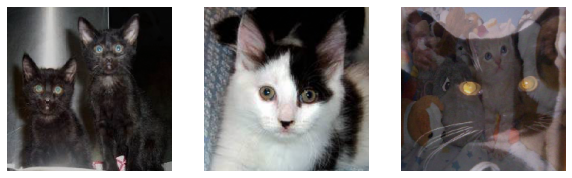

In [ ]:
import matplotlib.pyplot as plt

sample_images, sample_labels = next(iter(train_ds_mu))
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(zip(sample_images[:3], sample_labels[:3])):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(image.numpy().squeeze())
    print(label.numpy().tolist())
    plt.axis("off")

In [ ]:
mobilenet_model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=["accuracy"])

checkpoint_path = 'mixup_augmentation/checkpoint.ckpt'
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_weights_only=True,
                                                      verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                  mode='max', 
                                                  patience=5,
                                                  restore_best_weights=True)
mobilenet_model.fit(train_ds_mu,
                    epochs=10,
                    validation_data=val_data,
                    steps_per_epoch=len(train_data_one),
                    validation_steps=int(0.25 * len(val_data)),
                    callbacks=[model_checkpoint, early_stopping])

Epoch 1/10
313/313 [==============================] - ETA: 0s - loss: 0.4384 - accuracy: 0.3423
Epoch 1: saving model to mixup_augmentation/checkpoint.ckpt
313/313 [==============================] - 217s 680ms/step - loss: 0.4384 - accuracy: 0.3423 - val_loss: 0.5856 - val_accuracy: 0.5132
Epoch 2/10
313/313 [==============================] - ETA: 0s - loss: 0.4312 - accuracy: 0.3280
Epoch 2: saving model to mixup_augmentation/checkpoint.ckpt
313/313 [==============================] - 207s 661ms/step - loss: 0.4312 - accuracy: 0.3280 - val_loss: 0.5837 - val_accuracy: 0.6546
Epoch 3/10
313/313 [==============================] - ETA: 0s - loss: 0.4227 - accuracy: 0.3526
Epoch 3: saving model to mixup_augmentation/checkpoint.ckpt
313/313 [==============================] - 206s 657ms/step - loss: 0.4227 - accuracy: 0.3526 - val_loss: 0.5567 - val_accuracy: 0.7105
Epoch 4/10
313/313 [==============================] - ETA: 0s - loss: 0.4199 - accuracy: 0.3248
Epoch 4: saving model to mixup_

In [ ]:
mobilenet_mixup = mobilenet_model.evaluate(val_data)
val_loss, val_acc = mobilenet_mixup
print(f'Validation loss: {val_loss:.4f} \nValidation accuracy: {val_acc:.4f} in MobileNetV3Small with Mixup augmentaion')

79/79 [==============================] - 892s 11s/step - loss: 0.5355 - accuracy: 0.7550
Validation loss: 0.5355 
Validation accuracy: 0.7550 in MobileNetV3Small with Mixup augmentaion


## Câu 10